In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.metrics import mean_absolute_error

In [2]:
data_visualize = pd.read_csv("DATE.csv")

data_visualize

,plant_date,DoY,(delta)PD
0,0.2083,237.2083,-0.1
1,0.4583,237.4583,-0.1
2,0.6250,237.6250,-0.1
3,0.6667,237.6667,-0.1
4,0.7083,237.7083,-0.1
...,...,...,...
407,40.8750,277.8750,-0.1
408,41.0000,278.0000,-0.1
409,41.0833,278.0833,-0.1
410,41.2083,278.2083,-0.1


In [44]:
LEARNING_RATE = 0.0001
TRAINNING_STEP = 100000
DISPLAY_STEP = 10000

X_LABLE = len(data_visualize.columns) - 1

W1_PRED = 0
W2_PRED = 0

In [45]:
data = np.loadtxt("DATE_np.csv", delimiter = ',', dtype = np.float32)

x = data[:, :X_LABLE]
y = data[:, [-1]]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42, shuffle = False)

w1 = tf.Variable(tf.random.uniform([X_LABLE, 1], 0, 1))
w2 = tf.Variable(tf.random.uniform([X_LABLE, 1], 0, 1))
bias = tf.Variable(random.random())

In [37]:
def compute_loss():
    hypothesis = tf.matmul(x_train * x_train, w1) + tf.matmul(x_train, w2) + bias
    loss = tf.reduce_mean((y_train - hypothesis) ** 2)
    
    return loss

optimizer = tf.optimizers.Adam(lr = LEARNING_RATE)

for step in range(1, TRAINNING_STEP + 1):
    optimizer.minimize(compute_loss, var_list = [w1, w2, bias])
    
    if step % DISPLAY_STEP == 0:
        print('step:', step, '\n', 'w1:\n', w1.numpy(), '\n', 'w2:\n', w2.numpy(), '\n', 
              'bias:', bias.numpy(), '\n', 'loss:', compute_loss().numpy(), '\n')
        
        W1_PRED = w1.numpy()
        W2_PRED = w2.numpy()

step: 10000 
 w1:
 [[ 0.07369353]
 [-0.00184978]] 
 w2:
 [[-0.27192247]
 [ 0.38497955]] 
 bias: 0.6214872 
 loss: 186.01665 

step: 20000 
 w1:
 [[ 0.01646732]
 [-0.0015599 ]] 
 w2:
 [[-0.14239588]
 [ 0.37908962]] 
 bias: 0.598313 
 loss: 1.0379741 

step: 30000 
 w1:
 [[ 0.00615844]
 [-0.00149056]] 
 w2:
 [[0.1959554 ]
 [0.35447493]] 
 bias: 0.5456424 
 loss: 0.1028988 

step: 40000 
 w1:
 [[ 0.00287733]
 [-0.00147279]] 
 w2:
 [[0.3045272 ]
 [0.34740034]] 
 bias: 0.53046966 
 loss: 0.017925208 

step: 50000 
 w1:
 [[ 0.00196389]
 [-0.0014686 ]] 
 w2:
 [[0.33475024]
 [0.34545007]] 
 bias: 0.5262831 
 loss: 0.013357787 

step: 60000 
 w1:
 [[ 0.00171501]
 [-0.00146659]] 
 w2:
 [[0.343017  ]
 [0.34491968]] 
 bias: 0.5251588 
 loss: 0.010906246 

step: 70000 
 w1:
 [[ 0.0016464 ]
 [-0.00146636]] 
 w2:
 [[0.3452843 ]
 [0.34477314]] 
 bias: 0.5248498 
 loss: 0.010939658 

step: 80000 
 w1:
 [[ 0.00162818]
 [-0.00146618]] 
 w2:
 [[0.34590778]
 [0.34474736]] 
 bias: 0.5248025 
 loss: 0.010866

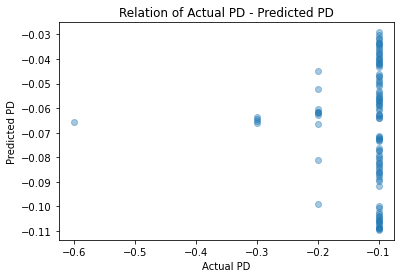

In [41]:
y_hat = tf.matmul(x_test * x_test, W1_PRED) + tf.matmul(x_test, W2_PRED) + bias

plt.scatter(y_test, y_hat, alpha = 0.4)
plt.xlabel('Actual PD')
plt.ylabel('Predicted PD')
plt.title('Relation of Actual PD - Predicted PD')
plt.show()

In [46]:
mse = mean_squared_error(y_test, y_hat)
rmse = np.sqrt(mse)

print("RMSE:", rmse)
print("MAE:", mean_absolute_error(y_test, y_hat))

RMSE: 0.09025014
MAE: 0.057072014
